In [ ]:
!unzip TDNMax_zip.zip

unzip:  cannot find or open TDNMax_zip.zip, TDNMax_zip.zip.zip or TDNMax_zip.zip.ZIP.


In [ ]:
import tensorflow as tf
from tensorflow import keras
# from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


Using TensorFlow backend.


In [ ]:
import os, os.path
# print len([name for name in os.listdir('.') if os.path.isfile(name)])

# path joining version for other paths
DIR = '/content/TDNMax_zip/'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

10386


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import cv2

In [ ]:
import glob
images = []
labels = []
DATADIR = "/content"
CATEGORIES = ["TDNMax_zip"]
image_paths = glob.glob("TDNMax_zip/*.jpg")
for image_path in image_paths:
    img=cv2.imread(image_path,0)
    res=cv2.resize(img,(32,32))
    label = image_path.split(".")[0].split("/")[1].split(" ")[0]

    # add the current image and label to the lists
    images.append(res)
    labels.append(label)

In [ ]:
images=np.array(images)
labels=np.array(labels)

In [ ]:
images.shape

(10386, 32, 32)

In [ ]:
lb = LabelEncoder()
labels_new = lb.fit_transform(labels)
from keras.utils.np_utils import to_categorical
labels_new=to_categorical(labels_new,108)

In [ ]:
np.save('/content/labels.npy',labels_new)

In [ ]:
# print(len(labels))
# labels_new[0]
images.shape

(10386, 32, 32)

In [ ]:
img_height_rows = 32
img_width_cols = 32


In [ ]:
im_shape = (img_height_rows, img_width_cols, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_new, test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
X_test = X_test.reshape(X_test.shape[0], *im_shape)

In [ ]:
X_train.shape

(6958, 32, 32, 1)

In [ ]:
cnn = Sequential()
kernelSize = (3, 3)
ip_activation = 'relu'
# ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
# cnn.add(ip_conv_0)
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
# ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
# cnn.add(ip_conv_1_1)

pool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)


# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

flat_layer_0 = Flatten()
cnn.add(Flatten())

h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)


op_activation = 'softmax'
output_layer = Dense(units=108, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)


opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [ ]:
history = cnn.fit(X_train, y_train,
                  batch_size=32, epochs=20)

Epoch 1/20
6958/6958 [==============================] - 15s 2ms/step - loss: 3.3541 - accuracy: 0.2101
Epoch 2/20
6958/6958 [==============================] - 14s 2ms/step - loss: 0.8644 - accuracy: 0.7246
Epoch 3/20
6958/6958 [==============================] - 14s 2ms/step - loss: 0.4202 - accuracy: 0.8671
Epoch 4/20
6958/6958 [==============================] - 14s 2ms/step - loss: 0.2647 - accuracy: 0.9103
Epoch 5/20
6958/6958 [==============================] - 14s 2ms/step - loss: 0.2062 - accuracy: 0.9333
Epoch 6/20
6958/6958 [==============================] - 15s 2ms/step - loss: 0.1626 - accuracy: 0.9493
Epoch 7/20
6958/6958 [==============================] - 14s 2ms/step - loss: 0.1419 - accuracy: 0.9521
Epoch 8/20
6958/6958 [==============================] - 14s 2ms/step - loss: 0.1280 - accuracy: 0.9588
Epoch 9/20
6958/6958 [==============================] - 14s 2ms/step - loss: 0.0810 - accuracy: 0.9760
Epoch 10/20
6958/6958 [==============================] - 14s 2ms/step - l

In [ ]:
score,acc=cnn.evaluate(X_test,y_test)

3428/3428 [==============================] - 2s 514us/step


In [ ]:
print("Test score: ",score)

Test score:  0.4313131020107723


In [ ]:
print("Test acc: ",acc)

Test acc:  0.9081096649169922


In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
images.shape

(10386, 32, 32)

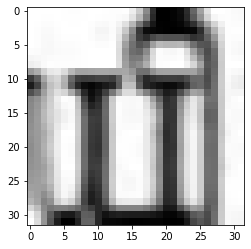

In [ ]:
plt.imshow(images[14],cmap="gray")

In [ ]:
np.argmax(cnn.predict(np.expand_dims(images[14],axis=(0,-1))))

105